In [ ]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [ ]:

output_folder = "/content/drive/MyDrive/dataset_image/splitted_dataset"

In [ ]:
img_size = (256, 256)
batch_size = 8

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    output_folder + "/train",
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    output_folder + "/val",
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    output_folder + "/test",
    labels="inferred",
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=False
)

Found 28020 files belonging to 2 classes.
Found 8005 files belonging to 2 classes.
Found 4005 files belonging to 2 classes.


In [ ]:
input_folder = "/content/drive/MyDrive/dataset_image/train"

In [ ]:
import splitfolders

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2, 0.1))

ValueError: The provided input folder "/content/drive/MyDrive/dataset_image/train" does not exists.

In [ ]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(512,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 125, 125, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 16)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,004,816 (41.98 MB)

 Trainable params: 11,004,816 (41.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    epochs=5,
    validation_data=val_ds,
    )

Epoch 1/5
3503/3503 ━━━━━━━━━━━━━━━━━━━━ 6912s 2s/step - accuracy: 0.6632 - loss: 1.1866 - val_accuracy: 0.8179 - val_loss: 0.4102
Epoch 2/5
3503/3503 ━━━━━━━━━━━━━━━━━━━━ 5755s 2s/step - accuracy: 0.8384 - loss: 0.3613 - val_accuracy: 0.9049 - val_loss: 0.2291
Epoch 3/5
3503/3503 ━━━━━━━━━━━━━━━━━━━━ 5527s 2s/step - accuracy: 0.9147 - loss: 0.2098 - val_accuracy: 0.9295 - val_loss: 0.1683
Epoch 4/5
3503/3503 ━━━━━━━━━━━━━━━━━━━━ 5757s 2s/step - accuracy: 0.9405 - loss: 0.1502 - val_accuracy: 0.9368 - val_loss: 0.1553
Epoch 5/5
3503/3503 ━━━━━━━━━━━━━━━━━━━━ 5591s 2s/step - accuracy: 0.9556 - loss: 0.1130 - val_accuracy: 0.9417 - val_loss: 0.1545


In [ ]:
# See what metrics were recorded during training
print("Available metrics:", history.history.keys())

# Print final training results
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

Available metrics: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Final Training Accuracy: 95.74%
Final Validation Accuracy: 94.17%
Final Training Loss: 0.1083
Final Validation Loss: 0.1545


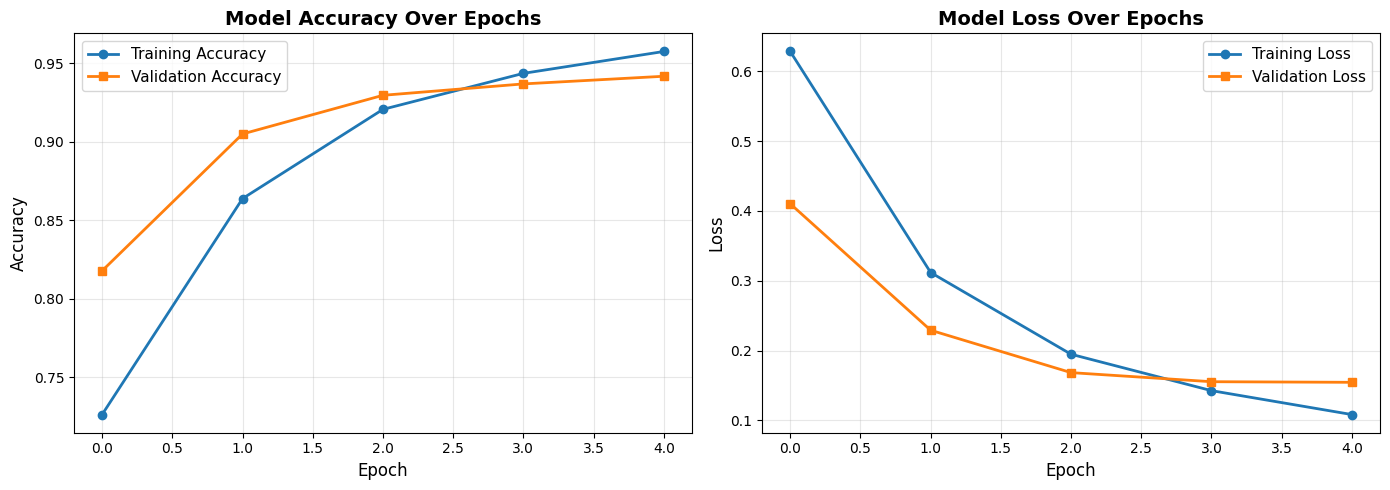


 How to read these graphs:
 GOOD: Both training and validation curves go down (loss) or up (accuracy)
OVERFITTING: Training much better than validation
UNDERFITTING: Both training and validation are poor


In [ ]:
import matplotlib.pyplot as plt

# Create figure with 2 subplots side by side
plt.figure(figsize=(14, 5))

# Plot 1: Accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], marker='s', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], marker='s', label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Interpretation help
print("\n How to read these graphs:")
print(" GOOD: Both training and validation curves go down (loss) or up (accuracy)")
print("OVERFITTING: Training much better than validation")
print("UNDERFITTING: Both training and validation are poor")

In [ ]:
# Evaluate model on test set (data it has never seen)
print(" Evaluating model on test dataset...\n")

test_loss, test_accuracy = model.evaluate(test_ds)

print(f"TEST RESULTS:")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# This is your model's real-world performance!

 Evaluating model on test dataset...

501/501 ━━━━━━━━━━━━━━━━━━━━ 541s 1s/step - accuracy: 0.9389 - loss: 0.1571
TEST RESULTS:
Test Accuracy: 94.08%
Test Loss: 0.1473


In [ ]:
import numpy as np

# Get predictions for all test images
print("Making predictions on test set...")
predictions = model.predict(test_ds)

# Get the actual correct labels
actual_labels = []
for images, labels in test_ds:
    actual_labels.extend(np.argmax(labels.numpy(), axis=1))

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get class names
class_names = test_ds.class_names
print(f"\nClasses in your dataset: {class_names}")
print(f"Total test images: {len(actual_labels)}")
print(f"Predictions complete!")

Making predictions on test set...
501/501 ━━━━━━━━━━━━━━━━━━━━ 188s 376ms/step

Classes in your dataset: ['fake', 'real']
Total test images: 4005
Predictions complete!


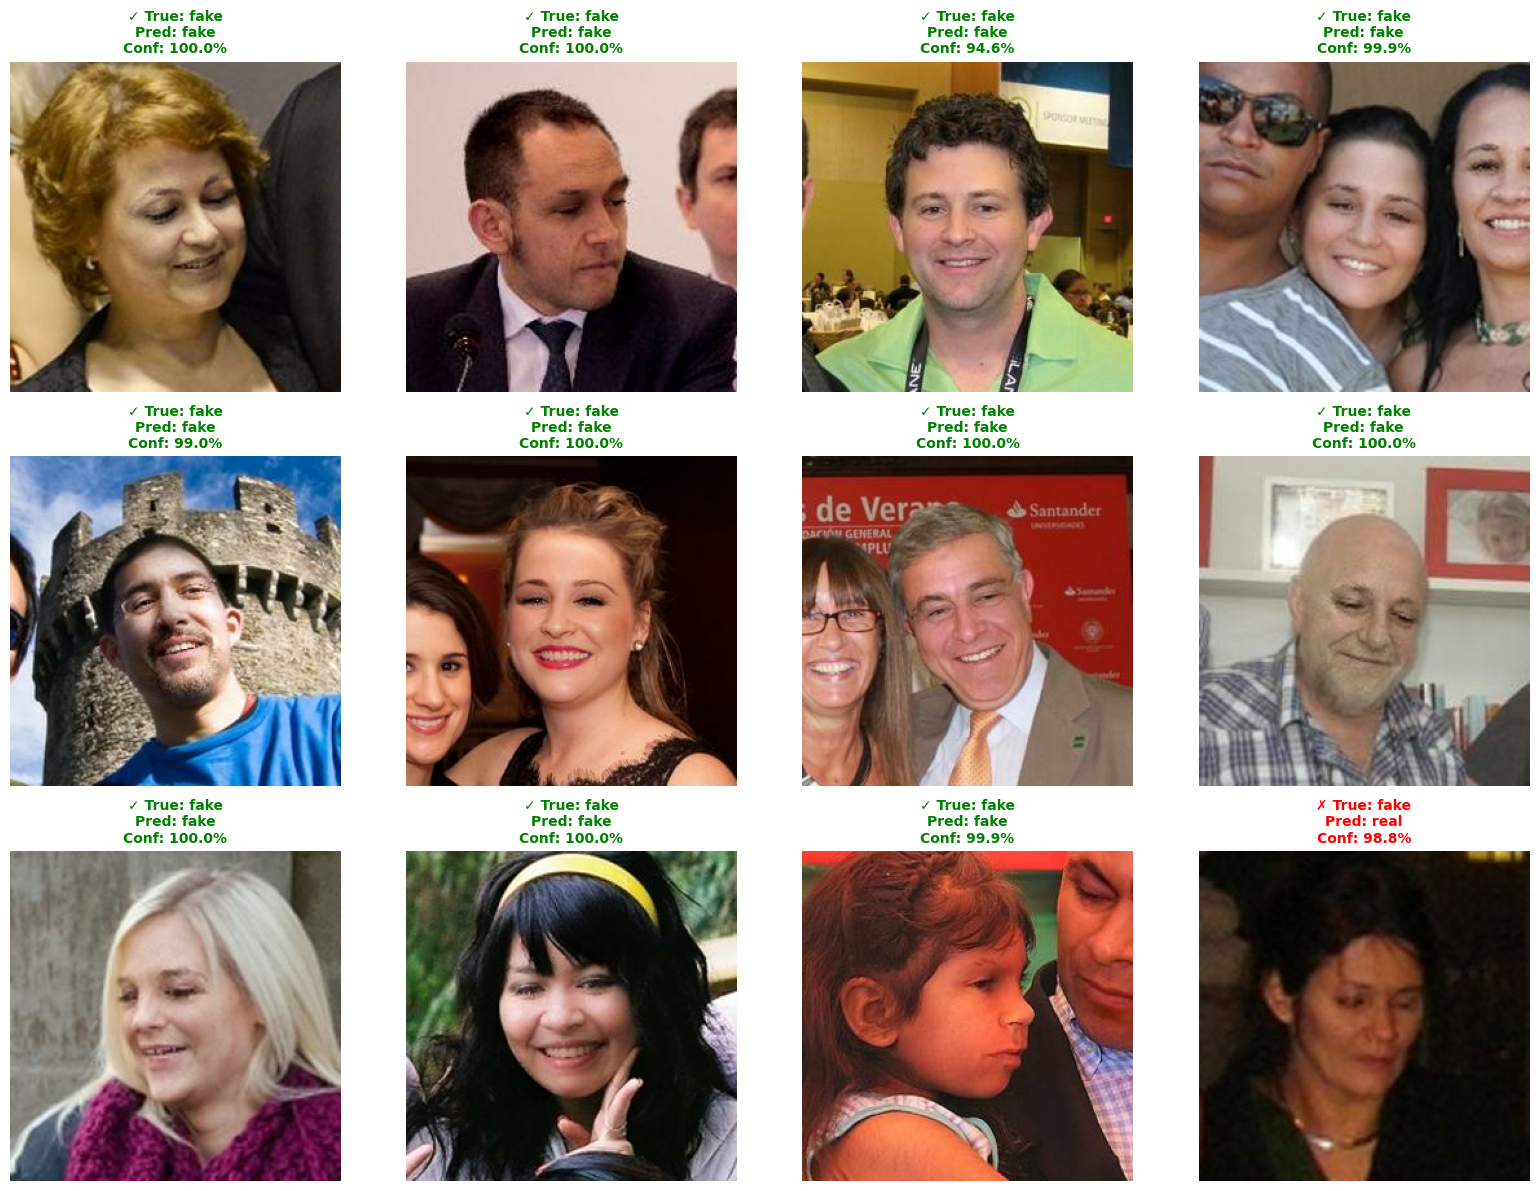


Legend:
Green = Correct prediction
Red = Wrong prediction


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Show 12 test images with predictions
plt.figure(figsize=(16, 12))

image_count = 0
for images, labels in test_ds.take(2):  # Take 2 batches
    for i in range(len(images)):
        if image_count >= 12:  # Show only 12 images
            break

        plt.subplot(3, 4, image_count + 1)

        # Display image
        plt.imshow(images[i].numpy().astype("uint8"))

        # Get true and predicted labels
        true_label = class_names[np.argmax(labels[i])]
        pred_label = class_names[np.argmax(predictions[image_count])]
        confidence = np.max(predictions[image_count]) * 100

        # Set title color: green if correct, red if wrong
        if true_label == pred_label:
            color = 'green'
            symbol = '✓'
        else:
            color = 'red'
            symbol = '✗'

        plt.title(f"{symbol} True: {true_label}\nPred: {pred_label}\nConf: {confidence:.1f}%",
                  color=color, fontsize=10, fontweight='bold')
        plt.axis('off')

        image_count += 1

    if image_count >= 12:
        break

plt.tight_layout()
plt.show()

print("Green = Correct prediction")
print("Red = Wrong prediction")

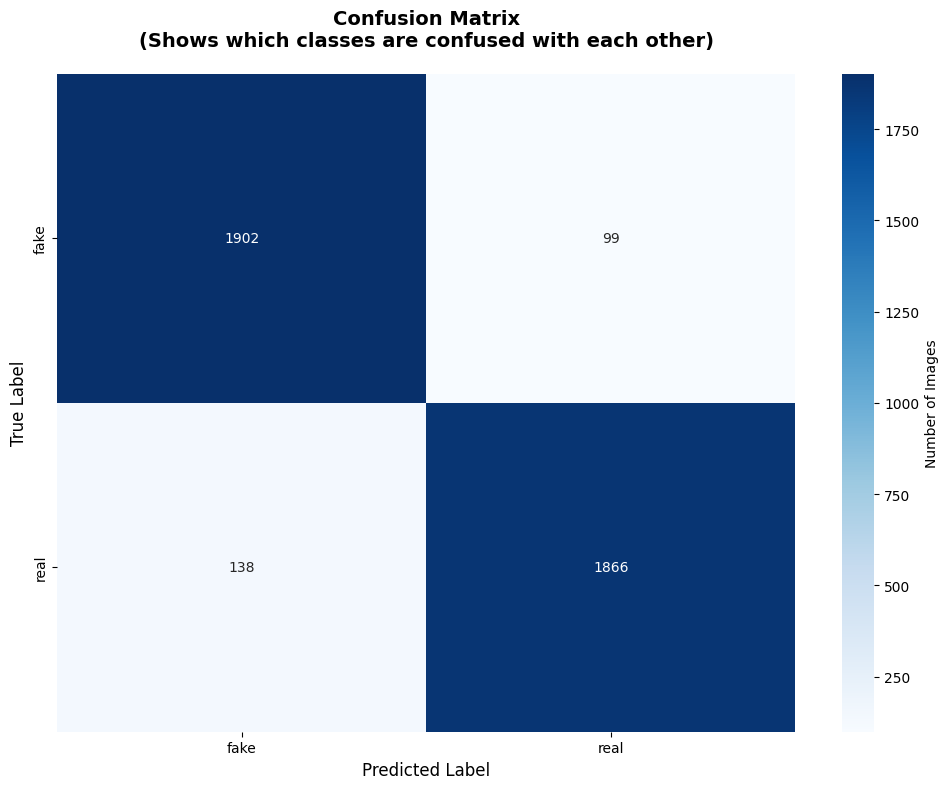


How to read this:
Diagonal (dark blue) = Correct predictions
Off-diagonal = Mistakes (which classes were confused)
Darker colors = More images


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Number of Images'})
plt.title('Confusion Matrix\n(Shows which classes are confused with each other)',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nHow to read this:")
print("Diagonal (dark blue) = Correct predictions")
print("Off-diagonal = Mistakes (which classes were confused)")
print("Darker colors = More images")

In [ ]:
# Print detailed classification report
report = classification_report(actual_labels, predicted_labels,
                               target_names=class_names,
                               digits=3)
print(report)


              precision    recall  f1-score   support

        fake      0.932     0.951     0.941      2001
        real      0.950     0.931     0.940      2004

    accuracy                          0.941      4005
   macro avg      0.941     0.941     0.941      4005
weighted avg      0.941     0.941     0.941      4005



In [ ]:

import json
import os
from google.colab import files
import tensorflow as tf

print("="*80)
print("SAVING YOUR MODEL PERMANENTLY")
print("="*80)

# Create folder in Google Drive
model_dir = '/content/drive/MyDrive/trained_models'
os.makedirs(model_dir, exist_ok=True)
print(f"\nFolder created: {model_dir}")

# Save model in .keras format
model_path = f'{model_dir}/fake_real_classifier.keras'
model.save(model_path)
print(f"Model saved: {model_path}")

# Check file size
file_size_mb = os.path.getsize(model_path) / (1024 * 1024)
print(f"File size: {file_size_mb:.2f} MB")

# Save model information
model_info = {
    'class_names': train_ds.class_names,
    'num_classes': len(train_ds.class_names),
    'image_size': [256, 256],
    'input_shape': [256, 256, 3],
    'total_parameters': int(model.count_params()),
    'test_accuracy': 94.08,  # Your accuracy
    'epochs_trained': 5,
    'tensorflow_version': tf.__version__,
    'preprocessing': 'Resize to 256x256, no normalization needed (model handles it)'
}

info_path = f'{model_dir}/model_info.json'
with open(info_path, 'w') as f:
    json.dump(model_info, f, indent=4)
print(f" Info saved: {info_path}")

print("MODEL SAVED SUCCESSFULLY IN GOOGLE DRIVE!")

SAVING YOUR MODEL PERMANENTLY

Folder created: /content/drive/MyDrive/trained_models
Model saved: /content/drive/MyDrive/trained_models/fake_real_classifier.keras
File size: 125.93 MB
 Info saved: /content/drive/MyDrive/trained_models/model_info.json
MODEL SAVED SUCCESSFULLY IN GOOGLE DRIVE!


In [ ]:
files.download(model_path)

files.download(info_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
# Check if files exist
model_exists = os.path.exists(model_path)
info_exists = os.path.exists(info_path)

if model_exists:
    size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(f"Model file exists: {model_path}")
    print(f"Size: {size_mb:.2f} MB")
else:
    print(f"Model file NOT found!")

if info_exists:
    print(f"Info file exists: {info_path}")
else:
    print(f"Info file NOT found!")

print(f"{model_dir}")


Model file exists: /content/drive/MyDrive/trained_models/fake_real_classifier.keras
Size: 125.93 MB
Info file exists: /content/drive/MyDrive/trained_models/model_info.json
/content/drive/MyDrive/trained_models


In [ ]:
pip install split-folders